In [1]:
df <- read.csv("/media/igna/Data/CRI_IA/Teacher_to_teacher/time_data.csv")

In [2]:
head(df)

X,author,date_message,forum_name,nb_messages,topic_name,year,month,weekday,day
0,blanc78,2010-02-23 16:46:05,Mathématiques,18 messages,la droite graduée au ce1,2010,2,1,23
1,Yaka...,2010-02-10 17:36:40,Mathématiques,3 517 messages,Symétrie au cm1,2010,2,2,10
2,elodieh,2010-02-21 11:39:24,Mathématiques,73 messages,Symétrie au cm1,2010,2,6,21
3,cdkm,2010-02-21 11:52:19,Mathématiques,662 messages,Symétrie au cm1,2010,2,6,21
4,Stefan,2010-02-21 17:16:09,Mathématiques,2 529 messages,Symétrie au cm1,2010,2,6,21
5,valou44,2010-02-22 11:03:59,Mathématiques,417 messages,Symétrie au cm1,2010,2,0,22


In [3]:
dim(df)

[1] 676757     10

## Defining link between users

To define links between users, we will get inspired [from this article](http://cseweb.ucsd.edu/~voelker/pubs/forums-imc11.pdf)

From user $u_2$ to user $u_1$ if $u_2$ posted in the same threat than $u_1$ after $u_1$. This means that for big threats, the first user posting will be linked to all users posting after him. We could consider links only if the subsequent post came at most 1 week (or 1 month, or 1 day, to evaluate) after the first post.

We could later use more advanced techniques, such as parsing Quotes and @User calls.

Then you can consider pairs of nodes with reciprocal links, the strength of links, their evolution, etc...

Social network growth: 
   - for a user, how many time between first post and creating a new issue?
   - or, engagement if a user write in a non-holiday period

Group Elevation:
   - passing from one issue to another? in particular for issues like CP au jour le jour
  
User Interaction:
   - Which percentage of the people your are linked with account to which percentage of your interactions (like a nestedness)

#### First, nb of different issues, nb of users per issue, time length of issues

In [4]:
length(unique(paste(df$forum_name,df$topic_name)))

[1] 56743

In [5]:
T <- table(paste(df$forum_name,df$topic_name))

In [6]:
head(table(T),n=20)

T
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
7087 6808 7131 5862 4795 3801 3170 2515 2040 1652 1405 1161 1026  780  702  589 
  17   18   19   20 
 479  471  414  348 

In [7]:
max(T)

[1] 5281

In [8]:
cT <- cut(T,breaks=c(0,1,2,5,10,20,50,100,200,500,1000,6000))

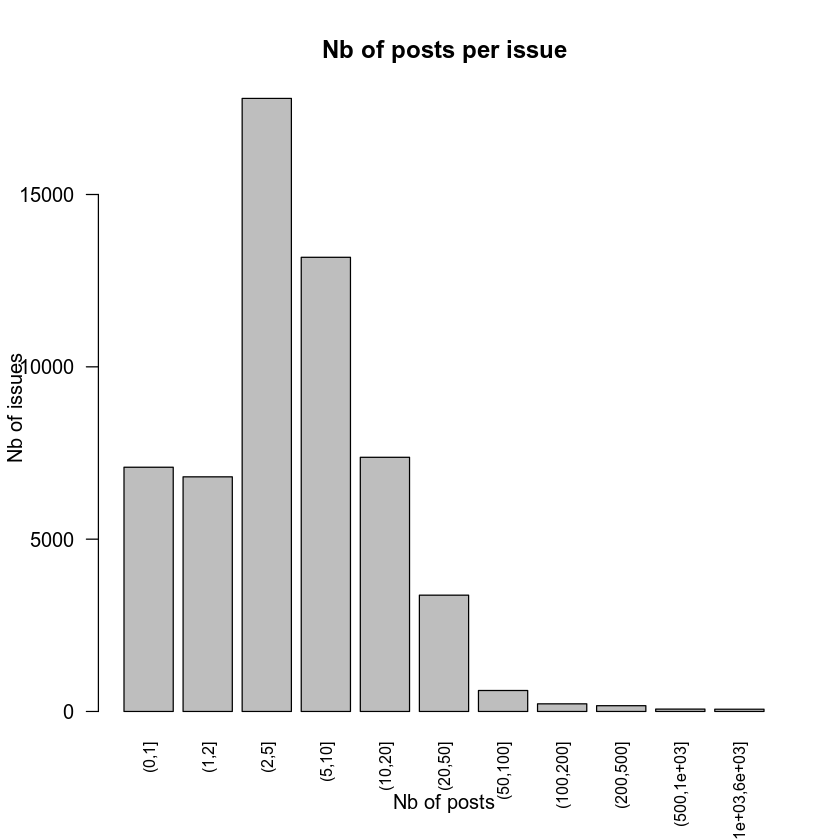

In [9]:
barplot(table(cT),las=2,cex.names=0.8,main="Nb of posts per issue",xlab = "Nb of posts", ylab = "Nb of issues")

#### Time difference between first and last post per issue

In [10]:
df$date_ts <- strptime(as.character(df$date_message), format = "%Y-%m-%d %H:%M:%S")

In [12]:
str(df$date_ts)

 POSIXlt[1:676757], format: "2010-02-23 16:46:05" "2010-02-10 17:36:40" "2010-02-21 11:39:24" ...


In [38]:
L <- tapply(df$date_ts,paste(df$forum_name,df$topic_name),function(x){
        diff_time <- max(x)-min(x)
        units(diff_time) <- "days"
        diff_time
     })

In [19]:
summary(L)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.000    1.939    6.579  155.363   23.076 5555.850 

In [44]:
cL <- cut(L,breaks=c(-1,0,0.5,1,2,3,4,5,6,7,14,30,60,365,6000))

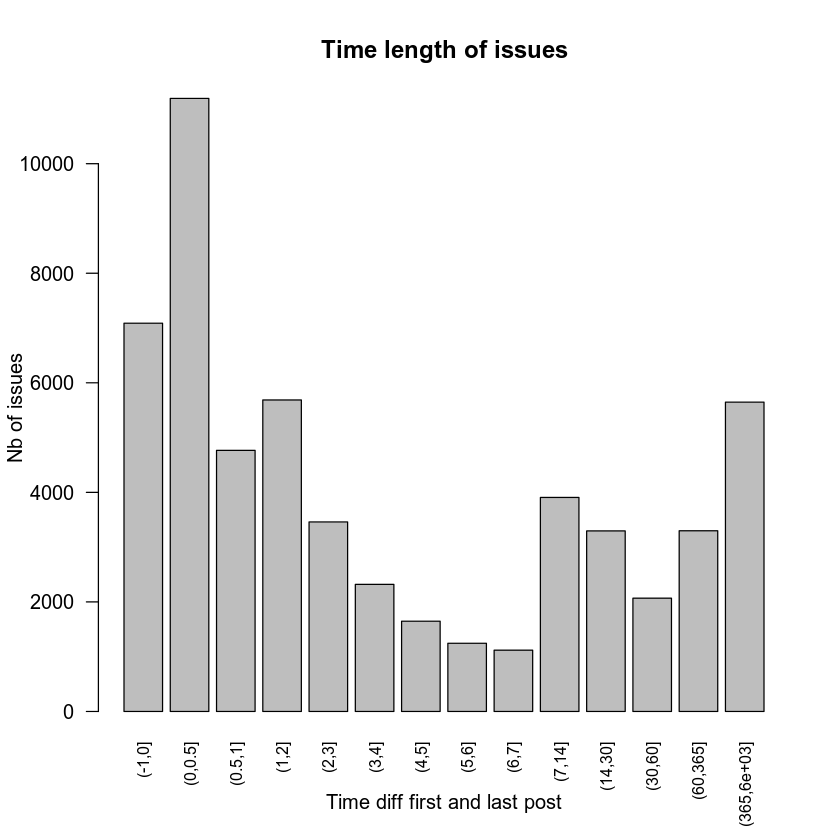

In [45]:
barplot(table(cL),las=2,cex.names=0.8,main="Time length of issues",xlab = "Time diff first and last post", ylab = "Nb of issues")

In [48]:
df <- df[order(df$forum_name,df$topic_name,df$date_ts),]

In [53]:
-(seq(3))

[1] -1 -2 -3

In [49]:
shift <- function(x, n){
  c(x[-(seq(n))], rep(NA, n))
}

df$shifted_ts <- shift(df$date_ts, 1)

In [54]:
df$diff_time <- df$shifted_ts - df$date_ts

In [56]:
units(df$diff_time) <- "mins"

In [57]:
head(df$diff_time)

Time differences in mins
[1]  1.407030e+04  9.746950e+03  7.529717e+03  3.784483e+03 -1.507339e+06
[6]  6.276667e+01

In [59]:
head(c(1,2),-1)

[1] 1

In [61]:
df$last_elem_topic <- shift(!duplicated(paste(df$forum_name,df$topic_name)),1)

In [66]:
library(ggplot2)

In [83]:
df$nb_diff_time <- as.numeric(df$diff_time)

In [81]:
#df$log_diff_time <- log(as.numeric(df$diff_time),base=10)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 123 rows containing non-finite values (stat_bin).”

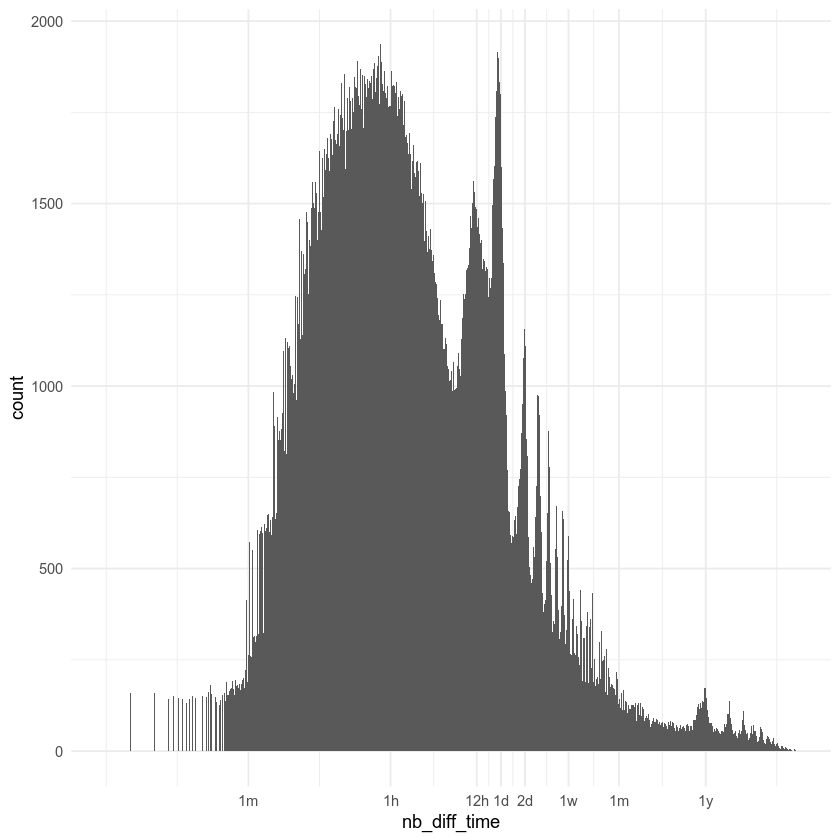

In [95]:
ggplot(df[!df$last_elem_topic,], aes(x = nb_diff_time)) + geom_histogram(bins=1000) + 
scale_x_log10(breaks = c(0,1,60,60*12,60*24,60*24*2,60*24*7,60*24*30,60*24*365) ,
              labels = c("0","1m","1h","12h","1d","2d","1w","1m","1y")) +
theme_minimal()
#scale_x_continuous(breaks = c(0,1,60,60*24,60*24*7,60*24*30) , 
#                   labels = c("0","1m","1h","1d","1w","1m"))

#### Nb of users per issue

In [97]:
LU <- tapply(as.character(df$author),paste(df$forum_name,df$topic_name),function(x){
        length(unique(x))
     })

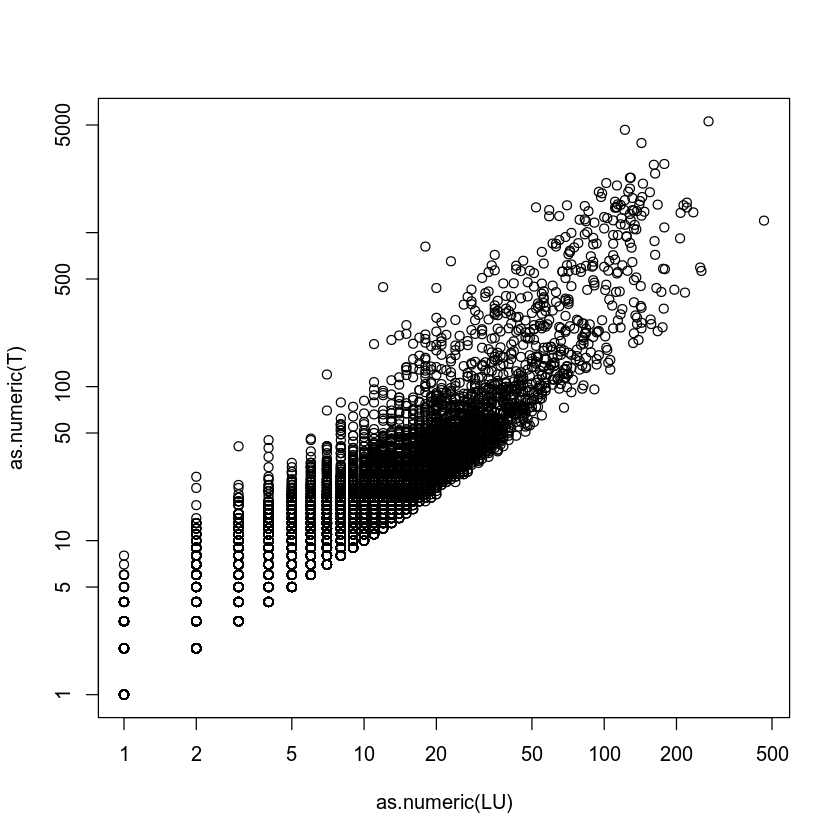

In [102]:
plot(as.numeric(LU),as.numeric(T),log = "xy")

In [103]:
library(gdata)

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.

Attaching package: ‘gdata’

The following object is masked from ‘package:stats’:

    nobs

The following object is masked from ‘package:utils’:

    object.size

The following object is masked from ‘package:base’:

    startsWith



In [104]:
M <- data.frame(cbind(as.numeric(LU),as.numeric(T)))

In [105]:
head(M)

X1,X2
4,5
2,2
3,9
1,1
3,3
5,10


In [107]:
names(M) <- c("Nb_users","Nb_posts")

In [108]:
rownames(M)<-names(LU)

In [109]:
head(M)

,Nb_users,Nb_posts
Arts visuels 'Camouflage',4,5
"Arts visuels ""grande lessive""qui participe?",2,2
"Arts visuels ""Habiter les formes de la nature""",3,9
"Arts visuels ""joker""",1,1
"Arts visuels ""Moi ming""",3,3
"Arts visuels ""Objet"" de fin d'année",5,10


In [110]:
M$cat_nb_users <- cut(M$Nb_users,breaks=c(0,1,2,3,4,5,10,20,50,100,1000))

In [111]:
p <- ggplot(M, aes(x = cat_nb_users, y = Nb_posts)) +
        geom_boxplot() +
        scale_y_log10(name = "Nb posts",breaks = c(1,2,3,5,10,20,50,100,1000,10000)
                       ) +
        scale_x_discrete(name = "Nb users") +
        theme_bw() +
        theme(plot.title = element_text(size = 14, face = "bold"),
              text = element_text(size = 12),
              axis.title = element_text(face="bold"),
              axis.text.x=element_text(size = 11))

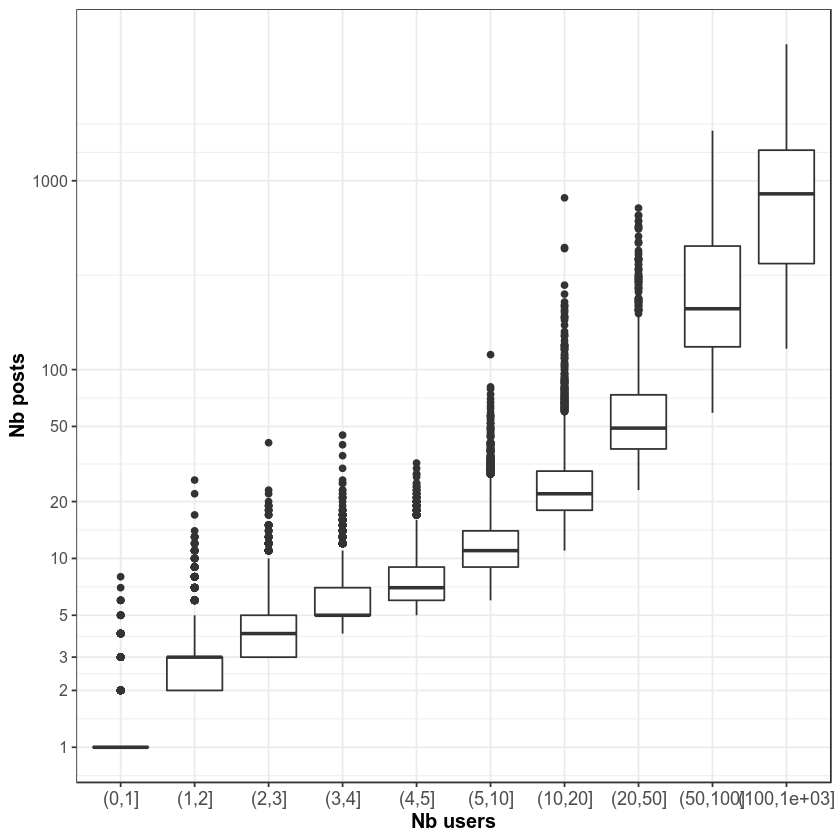

In [112]:
p

In [ ]:
MA$cat_sp <- reorder(MA$cat_sp,new.order = c('[30,100)','[100,200)','[200,500)','[500,1000)','>=1000'))

In [50]:
head(df[,c("date_ts","shifted_ts")])

,date_ts,shifted_ts
326904,2010-07-12 00:09:29,2010-07-21 18:39:47
326905,2010-07-21 18:39:47,2010-07-28 13:06:44
326906,2010-07-28 13:06:44,2010-08-02 18:36:27
326907,2010-08-02 18:36:27,2010-08-05 09:40:56
326908,2010-08-05 09:40:56,2007-09-23 15:21:42
358436,2007-09-23 15:21:42,2007-09-23 16:24:28


In [30]:
as.numeric(head(df$date_ts - df$shifted_ts))

[1] 1120165 -928964    -775  -19430  -64070   -3830

In [31]:
str(df$date_ts)

 POSIXlt[1:676757], format: "2010-02-23 16:46:05" "2010-02-10 17:36:40" "2010-02-21 11:39:24" ...


In [15]:
as.numeric(max(df$date_ts) - min(df$date_ts))

[1] 5826.848

In [12]:
head(as.character(df$date_message))

[1] "2010-02-23 16:46:05" "2010-02-10 17:36:40" "2010-02-21 11:39:24"
[4] "2010-02-21 11:52:19" "2010-02-21 17:16:09" "2010-02-22 11:03:59"

In [13]:
timestamp(head(as.character(df$date_message)), "%Y-%m-%d %H:%M:%S")

%Y-%m-%d %H:%M:%S2010-02-23 16:46:05 ------##
%Y-%m-%d %H:%M:%S2010-02-10 17:36:40 ------##
%Y-%m-%d %H:%M:%S2010-02-21 11:39:24 ------##
%Y-%m-%d %H:%M:%S2010-02-21 11:52:19 ------##
%Y-%m-%d %H:%M:%S2010-02-21 17:16:09 ------##
%Y-%m-%d %H:%M:%S2010-02-22 11:03:59 ------##


In [19]:
min(strptime(head(as.character(df$date_message)), format = "%Y-%m-%d %H:%M:%S"))

[1] "2010-02-10 17:36:40 CET"

In [15]:
max(strptime(head(as.character(df$date_message))))

##------ 2010-02-23 16:46:05 ------##
##------ 2010-02-10 17:36:40 ------##
##------ 2010-02-21 11:39:24 ------##
##------ 2010-02-21 11:52:19 ------##
##------ 2010-02-21 17:16:09 ------##
##------ 2010-02-22 11:03:59 ------##


[1] "##------ 2010-02-23 16:46:05 ------##"

In [14]:
head(timestamp(df$date_message))

In [ ]:

tapply(paste(df$forum_name,df$topic_name)